<a href="https://colab.research.google.com/github/AdamStajer07/pytorchTutorial/blob/main/PyTorchReview2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_circles

In [71]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [72]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

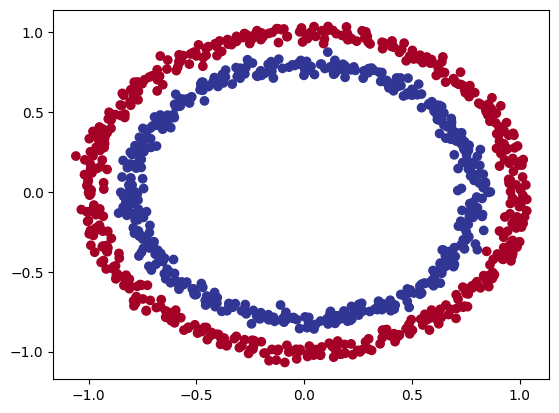

In [73]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [74]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=15)
    self.layer_2 = nn.Linear(in_features=15, out_features=15)
    self.layer_3 = nn.Linear(in_features=15, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = CircleModel()
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [76]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [77]:
torch.manual_seed(42)

epochs = 1500

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_loss = loss_fn(test_logits, y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | loss: {loss} | test_loss: {test_loss}')



Epoch: 0 | loss: 0.6939145922660828 | test_loss: 0.6948877573013306
Epoch: 100 | loss: 0.6888905167579651 | test_loss: 0.6908912062644958
Epoch: 200 | loss: 0.6849784851074219 | test_loss: 0.6877027750015259
Epoch: 300 | loss: 0.6797055006027222 | test_loss: 0.6838476061820984
Epoch: 400 | loss: 0.6715812087059021 | test_loss: 0.6776107549667358
Epoch: 500 | loss: 0.6580056548118591 | test_loss: 0.6664093732833862
Epoch: 600 | loss: 0.6348040103912354 | test_loss: 0.6462845802307129
Epoch: 700 | loss: 0.591495156288147 | test_loss: 0.6076172590255737
Epoch: 800 | loss: 0.5152173638343811 | test_loss: 0.5393148064613342
Epoch: 900 | loss: 0.3988719582557678 | test_loss: 0.4347163438796997
Epoch: 1000 | loss: 0.26646187901496887 | test_loss: 0.3088836967945099
Epoch: 1100 | loss: 0.16289398074150085 | test_loss: 0.20332713425159454
Epoch: 1200 | loss: 0.11499068140983582 | test_loss: 0.1520068198442459
Epoch: 1300 | loss: 0.07663785666227341 | test_loss: 0.10984869301319122
Epoch: 1400 |

In [78]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


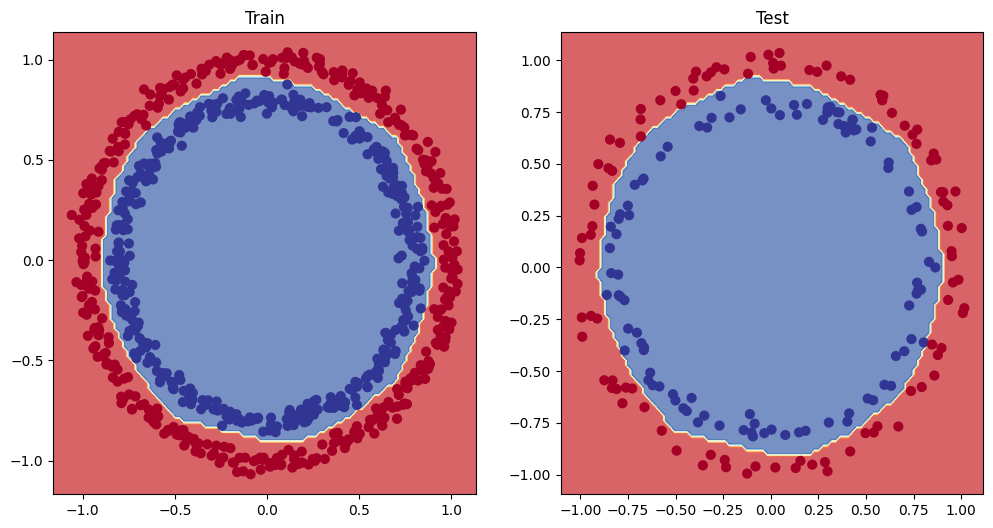

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)